<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Practices/blob/main/Week_6/Graded_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [31]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Common setup for the following questions

- From the MNIST dataset, create a new dataset by taking first $10000$ images for training and next $2000$ images for testing.
- Collect all digit $5$ (Positive class) and digit $3$ (Negative class) images and stack them properly as a single datamatrix.
- By convention, keep all digit $5$ images from index `0 to i` followed by digit $3$ images from index `i+1 to n` (`i` denotes the end index of digit $5$ images)
- Similarly, collect the respective labels and store it in a variable (Do sanity check).
- Set the label values to $1$ for positive class and $-1$ for negative class.
- Instantiate a perceptron classifier with the below parameters
```python
random_state = 42
learning rate = 1
iterations = 100
Should shuffle the dataset for each epoch (iteration)
Include the intercept (bias) term.
No regularization
```
Use the training set for fitting the perceptron model and use the test data to make the predictions. Answer the below questions.

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

In [21]:
X_train, y_train = X[:10000, :], y[:10000]
X_test, y_test = X[10000:12000, :], y[10000:12000]

idx_5_train = np.where(y_train == '5')[0]
idx_3_train = np.where(y_train == '3')[0]
idx_5_test = np.where(y_test == '5')[0]
idx_3_test = np.where(y_test == '3')[0]

X_train_53 = np.concatenate((X_train[idx_5_train], X_train[idx_3_train]))
y_train_53 = np.concatenate((np.ones(len(idx_5_train)), -1 * np.ones(len(idx_3_train))))
X_test_53 = np.concatenate((X_test[idx_5_test], X_test[idx_3_test]))
y_test_53 = np.concatenate((np.ones(len(idx_5_test)), -1 * np.ones(len(idx_3_test))))

In [22]:
clf = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, fit_intercept=True, penalty=None)
clf.fit(X_train_53, y_train_53)

Perceptron(eta0=1, max_iter=100, random_state=42)

# Problem 1
Make a tuple that gives the number of training samples of digit $5$ and $3$ respectively

In [24]:
samples_5 = len(np.where(y_train == '5')[0])
samples_3 = len(np.where(y_train == '3')[0])
print(f'Number of training samples of digit 5: {samples_5}')
print(f'Number of training samples of digit 3: {samples_3}')

Number of training samples of digit 5: 863
Number of training samples of digit 3: 1032


# Problem 2

Obtain confusion matrix for the test samples and the predicted samples. Find TP, TN, FP, FN?

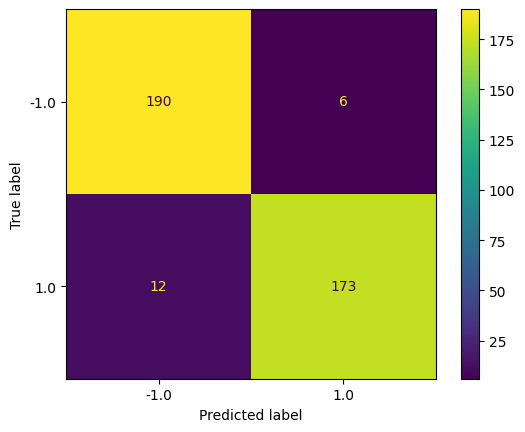

In [28]:
y_pred = clf.predict(X_test_53)
cm = ConfusionMatrixDisplay.from_predictions(y_test_53, y_pred)
plt.show()

# Problem 3
In the same model setup just change the shuffle parameter to False, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. Which of the following statements are True based on your observations?

Options:

- The accuracy value remains same while shuffle = True and shuffle = False.
- The precision score value decreased after setting shuffle = False.
- The recall score value decreased after setting shuffle = False.
- The accuracy value increased after setting shuffle = False.
- The precision score value increased after setting shuffle = False.
- The recall score value increased after setting shuffle = False.
- The accuracy value decreased after setting shuffle = False.

In [33]:
# When shuffle = False
clf2 = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=False, fit_intercept=True, penalty=None)
clf2.fit(X_train_53, y_train_53)
y_pred2 = clf2.predict(X_test_53)
print(classification_report(y_test_53, y_pred2))

              precision    recall  f1-score   support

        -1.0       0.53      1.00      0.70       196
         1.0       1.00      0.07      0.13       185

    accuracy                           0.55       381
   macro avg       0.77      0.54      0.41       381
weighted avg       0.76      0.55      0.42       381



In [34]:
# When shuffle = True
print(classification_report(y_test_53, y_pred))

              precision    recall  f1-score   support

        -1.0       0.94      0.97      0.95       196
         1.0       0.97      0.94      0.95       185

    accuracy                           0.95       381
   macro avg       0.95      0.95      0.95       381
weighted avg       0.95      0.95      0.95       381

